#### Group Member： 
|Names|Student ID|
|:---:|:--------:|
|GUO Yidan|1155132659|
|HE Yuxiang|1155128541|
|LI Run|1155128545|
|LI Ziyun|1155132664|
|XIAO Shengzong|1155132829|

## Data Overview

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing,metrics
pd.set_option("display.max_columns",75)

import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [2]:
#Read data
df = pd.read_csv("loan.csv", low_memory = False)

#An overview of the data
df.iloc[:,0:15].head(10)

,Unnamed: 0,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs
0,20,571203,18000,18000,60 months,10.16%,383.87,10+ years,MORTGAGE,72804.0,Current,credit_card,MA,16.73,0.0
1,40,641849,13200,13200,36 months,18.49%,480.47,2 years,RENT,110000.0,Current,debt_consolidation,IL,17.02,0.0
2,60,694891,15675,15675,36 months,8.90%,497.74,10+ years,MORTGAGE,100000.0,Current,small_business,WA,9.10,0.0
3,80,734736,21600,21600,36 months,7.90%,675.87,10+ years,MORTGAGE,95000.0,Fully Paid,house,WI,3.42,0.0
4,100,784712,16500,16500,60 months,7.90%,333.78,2 years,MORTGAGE,42000.0,Late (31-120 days),small_business,NY,10.43,0.0
5,120,807342,21000,21000,36 months,6.62%,644.78,10+ years,MORTGAGE,121392.0,Current,major_purchase,PA,19.53,0.0
6,140,843448,5500,5500,36 months,13.67%,187.10,3 years,RENT,55000.0,Fully Paid,debt_consolidation,NJ,20.71,0.0
7,160,880114,5600,5600,36 months,9.99%,180.67,1 year,RENT,75000.0,Current,debt_consolidation,NY,8.24,0.0
8,180,974654,6400,6400,36 months,15.80%,224.38,2 years,RENT,34000.0,Current,debt_consolidation,VA,32.40,0.0
9,200,999547,16000,16000,36 months,10.16%,517.48,NaN,RENT,155000.0,Late (31-120 days),debt_consolidation,CA,26.49,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
Unnamed: 0                10000 non-null int64
id                        10000 non-null int64
loan_amnt                 10000 non-null int64
funded_amnt               10000 non-null int64
term                      9524 non-null object
int_rate                  9524 non-null object
installment               9524 non-null float64
emp_length                9119 non-null object
home_ownership            9524 non-null object
annual_inc                9524 non-null float64
loan_status               9524 non-null object
purpose                   9524 non-null object
addr_state                10000 non-null object
dti                       9524 non-null float64
delinq_2yrs               9524 non-null float64
earliest_cr_line          9524 non-null object
mths_since_last_delinq    4100 non-null float64
open_acc                  9524 non-null float64
revol_bal                 9524 non-null

In [4]:
# The outcome variable: loan_status

df["loan_status"].value_counts()

Current               8122
Fully Paid             951
Charged Off            218
Late (31-120 days)     148
In Grace Period         48
Late (16-30 days)       21
Default                 16
Name: loan_status, dtype: int64

In [5]:
#Use the dropna command to delete the 4.76% of samples with severe data missing and complete the data set preprocessing.
df = df.dropna(thresh= 5)

## Descriptive statistical analysis

In [6]:
pic_df = df.loc[:, df.columns.str.contains('num')]
df_analysis = (df.dropna(thresh= 5))\
                     .assign(int_rate = lambda x: x['int_rate'].str.strip('%'))

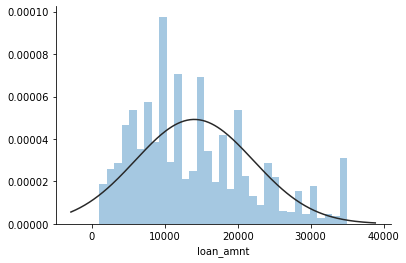

In [7]:
# Draw figures
# Please describe those figures and try to do your own analysis
plt.figure(1)
sns.distplot(df_analysis.loan_amnt,fit = norm, kde = False)
sns.despine(top = True)
#ingonre the font warning. It doesn't matter.
import warnings
warnings.filterwarnings('ignore')

Figure 1 shows loan amount's right skewed distribution. In the figure, most people's loan amount are on the left side. The mode of the loan amount is 10000,which is the most common number occurs.

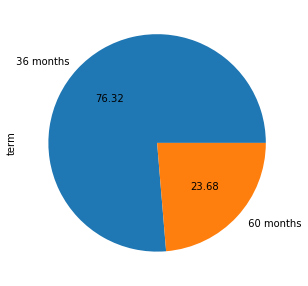

In [8]:
plt.figure(2)
df_analysis.term.value_counts().plot.pie(autopct = '%.2f',figsize = (5,5))

In the pie chart, 76.32% use a 36-month loan, while 23.68% choose a 60-month loan. It can be seen from the figure that the people who use the 36-month loan are much larger than those who use the 36-month loan, and the people who use the 36-month loan are three times the people who use the 60-month loan.

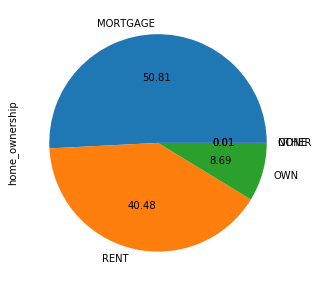

In [9]:
plt.figure(3)
df_analysis.home_ownership.value_counts().plot.pie(autopct = '%.2f',figsize = (5,5))

In the pie chart of home ownership,mortgage is 50.81%, which is the largest proportion of the home ownership. The second proportion is rent, which is 40.48%. The rest are own, other and none and their proportion are 8.69%,0.01% and 0.01%.

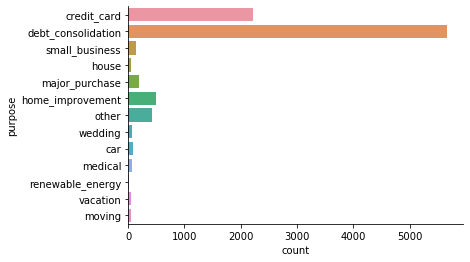

In [10]:
plt.figure(4)
sns.countplot(y = df_analysis.purpose)
sns.despine(top = True)

By using the countplot, we can see that the debt consolidation is the most common purpose,that is ,more than 5000 people use loan for debt consolidation. Credit card is the second most common purpose for loan and over 2000 people use loan for credit card. Also, home improvement is the third, other is the fourth and major purchase is the fifth and so on. In a word, most of the people use loan for debt consolidation and the total number of this purpose is much higher than total number of other's purpose. 

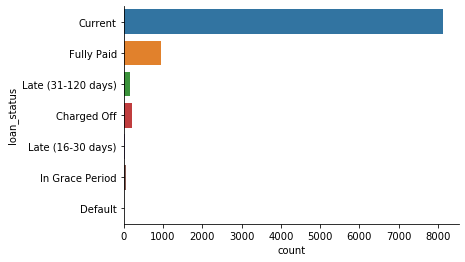

In [11]:
plt.figure(7)
sns.countplot(y = df_analysis.loan_status)
sns.despine(top = True)
plt.show()

In the good loan status, over 8000 people have current status and about 1000 people have fully paid in the status. In the bad loan status, there are late payment, charged off, in grace period and default. As we can see from the chart, the total number of people does not exceed 800. In conclusion, most of the people can pay in time and only a small proportion of people have bad loan status.

In [12]:
# rough look into differences among loan_status groups
groupd_status =  df_analysis.groupby(['loan_status'])
pay_data = groupd_status.agg({'loan_amnt': 'sum','out_prncp': 'sum','total_rec_prncp': 'sum','total_rec_int': 'sum'}) \
                     .assign(loan_amnt_pct = lambda x : x['loan_amnt']/x['loan_amnt'].sum(),
                              out_prncp_pct = lambda x : x['out_prncp']/x['out_prncp'].sum())

print(pay_data)

                    loan_amnt    out_prncp  total_rec_prncp  total_rec_int  \
loan_status                                                                  
Charged Off           2862500         0.00        401936.64      270087.79   
Current             117253100  94740945.77      22499429.03    11620861.86   
Default                281225    234275.02         46949.98       35271.69   
Fully Paid           12687950         0.00      12687923.42     1086953.44   
In Grace Period        691575    535642.36        155932.65       90996.11   
Late (16-30 days)      276675    218485.30         58189.69       40363.09   
Late (31-120 days)    2348450   1926644.91        421805.08      311868.35   

                    loan_amnt_pct  out_prncp_pct  
loan_status                                       
Charged Off              0.020986       0.000000  
Current                  0.859618       0.970150  
Default                  0.002062       0.002399  
Fully Paid               0.093019       0.

## Your turn

Use machine learning models to uncover the relationship between features and loan status.

Please note that, In this project, you have great flexbility in processing the variables, such as categorizing a feature into meaningful types.


### 1. Data Cleaning
<p>
<span style="color:blue">
> Removed all empty columns<br>
> Target variable 'loan_status' encoded to 0 or 1<br>
</span>
</p>

We treat the values of 'current' and 'fully paid' in 'loan status' as the good results, noted by '0'.

In [13]:
df = df.dropna(thresh= 5)
df0 = df.iloc[:,2:]    #delete the first two columns
df0 = df0.dropna(subset=['loan_status'])    #delete the missing values of 'loan_status'
di = {'Current':0,'Fully Paid':0,'Charged Off':1,'Late (31-120 days)':1,'In Grace Period':1,'Late (16-30 days)':1,'Default':1}
df_withbooltarget = df0.replace({'loan_status':di})

In [14]:
df_withbooltarget['loan_status'].value_counts()
print("Current shape of dataset :",df_withbooltarget.shape)
df_withbooltarget.head(3)

Current shape of dataset : (9524, 22)


,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int
0,18000,18000,60 months,10.16%,383.87,10+ years,MORTGAGE,72804.0,0,credit_card,MA,16.73,0.0,1995-12-27 02:06,NaN,21.0,8751.0,49.0,13263.18,7273.77,4736.82,2536.95
1,13200,13200,36 months,18.49%,480.47,2 years,RENT,110000.0,0,debt_consolidation,IL,17.02,0.0,2000-12-11 11:15,29.0,16.0,16062.0,36.0,10546.93,4324.23,2653.07,1671.16
2,15675,15675,36 months,8.90%,497.74,10+ years,MORTGAGE,100000.0,0,small_business,WA,9.10,0.0,1994-04-07 12:00,NaN,16.0,20650.0,45.0,15294.25,496.78,380.75,116.03


Delete 4 more columns that which we consider will have little effect on the predicted outcomes.

In [15]:
df1 = df_withbooltarget
del_col_names = ['purpose','mths_since_last_delinq','addr_state','earliest_cr_line']  #pending
df1 = df1.drop(labels = del_col_names, axis = 1)
print("Current shape of dataset :",df1.shape)

Current shape of dataset : (9524, 18)


In [16]:
Final_data = df1
Final_data["int_rate"] = Final_data["int_rate"].apply(lambda x:float(x[:-1]) ) #reomving % sign, conv to float  - int_rate column  convert to percentage
Final_data = Final_data.reset_index(drop=True)    #reindex
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (9524, 18)


### 2. Data Transformation and filling Missing values
<p>
<span style="color:blue">
> Encoded 'home_ownership' to numerical values. <br>
> Changed 'emp_Length' to numerical values in the below cell.<br>
> Transform 'term' into numerical form. <br>
> Filled missing values with the mean of the column.
</span>
</p>

In [17]:
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})    #home-ownership
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)    #convert the time length
Final_data["emp_length"] = Final_data["emp_length"].apply(lambda x:float(x))    #convert string to integer
Final_data['term'] = Final_data['term'].apply(lambda x: np.int8(x.split()[0]))
#print("Current shape of dataset :",Final_data.shape)
Final_data.head()
#Final_data.info()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int
0,18000,18000,60,10.16,383.87,10.0,6,72804.0,0,16.73,0.0,21.0,8751.0,49.0,13263.18,7273.77,4736.82,2536.95
1,13200,13200,36,18.49,480.47,2.0,5,110000.0,0,17.02,0.0,16.0,16062.0,36.0,10546.93,4324.23,2653.07,1671.16
2,15675,15675,36,8.90,497.74,10.0,6,100000.0,0,9.10,0.0,16.0,20650.0,45.0,15294.25,496.78,380.75,116.03
3,21600,21600,36,7.90,675.87,10.0,6,95000.0,0,3.42,0.0,9.0,416.0,24.0,0.00,23521.69,21600.00,1921.69
4,16500,16500,60,7.90,333.78,2.0,6,42000.0,1,10.43,0.0,9.0,2229.0,17.0,12966.64,5000.85,3533.36,1467.49


In [18]:
Final_data.fillna(Final_data.mean(),inplace = True)
Final_data["emp_length"] = Final_data["emp_length"].apply(lambda x:int(x))
#rearrange the columns of the final data
Final_data=Final_data[['loan_amnt','funded_amnt','int_rate','installment','emp_length','home_ownership','annual_inc','dti',
                       'delinq_2yrs','open_acc','revol_bal','total_acc','out_prncp','total_pymnt','total_rec_prncp',
                       'total_rec_int','term','loan_status']]
Final_data.info()
#Below are the final selected variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524 entries, 0 to 9523
Data columns (total 18 columns):
loan_amnt          9524 non-null int64
funded_amnt        9524 non-null int64
int_rate           9524 non-null float64
installment        9524 non-null float64
emp_length         9524 non-null int64
home_ownership     9524 non-null int64
annual_inc         9524 non-null float64
dti                9524 non-null float64
delinq_2yrs        9524 non-null float64
open_acc           9524 non-null float64
revol_bal          9524 non-null float64
total_acc          9524 non-null float64
out_prncp          9524 non-null float64
total_pymnt        9524 non-null float64
total_rec_prncp    9524 non-null float64
total_rec_int      9524 non-null float64
term               9524 non-null int64
loan_status        9524 non-null int64
dtypes: float64(12), int64(6)
memory usage: 1.3 MB


### 3. Feature scaling and spliting
<p>
<span style="color:blue">
> Splited the dataset into 2 by 'term': 36 months and 60 months. <br>
> Scaled all the features here using standard scaler. <br>
> Choose different features for dataset36 and dataset60 firstly by correlation matrix and common sense.
</span>
</p>

In [19]:
scl = preprocessing.StandardScaler() #instance of preprocessing   standarlize the data
fields = Final_data.columns.values[:-2]    
data_clean = pd.DataFrame(scl.fit_transform(Final_data[fields]), columns = fields)    #construct data_clean
data_clean['term'] = Final_data['term']
data_clean['loan_status'] = Final_data['loan_status']
data_clean['loan_status'].value_counts()    
#there are 9073 '0's in total and 451 '1's

0    9073
1     451
Name: loan_status, dtype: int64

In [20]:
data_with36 = data_clean[data_clean['term']==36]
data_with60 = data_clean[data_clean['term']==60]
data_with36=data_with36.drop('term',axis=1)
data_with60=data_with60.drop('term',axis=1)

dataset of term=36 months

In [21]:
data_with36.shape

(7269, 17)

dataset of term=60 months

In [22]:
data_with60.shape

(2255, 17)

##### Now we try to select features first depending on the correlation matrix of dataset36.

In [23]:
data_with36.corr()

,loan_amnt,funded_amnt,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,loan_status
loan_amnt,1.000000,0.999908,-0.075547,0.993871,0.105579,0.141255,0.425453,0.003618,0.007695,0.194651,0.414496,0.219570,0.787701,0.530830,0.465082,0.611507,-0.028027
funded_amnt,0.999908,1.000000,-0.075391,0.993985,0.105789,0.141134,0.425184,0.003548,0.007752,0.194794,0.414320,0.219762,0.787862,0.530736,0.464980,0.611486,-0.027999
int_rate,-0.075547,-0.075391,1.000000,0.017090,-0.023315,-0.145625,-0.094937,0.130530,0.121485,-0.034644,-0.089880,-0.102555,-0.043668,-0.023028,-0.085003,0.252568,0.078431
installment,0.993871,0.993985,0.017090,1.000000,0.103349,0.126470,0.415477,0.016171,0.019993,0.193377,0.403310,0.212333,0.783308,0.531959,0.457825,0.648295,-0.020205
emp_length,0.105579,0.105789,-0.023315,0.103349,1.000000,0.143576,0.085950,0.034992,0.061191,0.036771,0.138015,0.121491,0.095159,0.036519,0.033526,0.035675,-0.024667
home_ownership,0.141255,0.141134,-0.145625,0.126470,0.143576,1.000000,0.192031,-0.027366,0.060842,0.121199,0.145013,0.196279,0.128493,0.049270,0.051544,0.022009,-0.039408
annual_inc,0.425453,0.425184,-0.094937,0.415477,0.085950,0.192031,1.000000,-0.236054,0.086465,0.181291,0.414846,0.258977,0.330186,0.235449,0.220081,0.212715,-0.057838
dti,0.003618,0.003548,0.130530,0.016171,0.034992,-0.027366,-0.236054,1.000000,-0.009700,0.282081,0.145762,0.211635,0.034711,-0.039899,-0.056016,0.044534,0.042768
delinq_2yrs,0.007695,0.007752,0.121485,0.019993,0.061191,0.060842,0.086465,-0.009700,1.000000,0.054125,-0.017622,0.148401,0.016804,-0.010529,-0.017199,0.022373,0.015372
open_acc,0.194651,0.194794,-0.034644,0.193377,0.036771,0.121199,0.181291,0.282081,0.054125,1.000000,0.256797,0.668856,0.185699,0.060571,0.046948,0.096497,-0.035346


Those correlation coefficients whose magnitude are below 0.5 are considered having little correlation. Accordingly we excluded part of the variables together with the consideration of common sense on the features' meanings. (for example, the number of someone's total accounts and the number of open accounts usually has close relationship)

In [24]:
del_col_names = ['loan_amnt','installment','delinq_2yrs','open_acc','total_pymnt','total_rec_int']
data_with36_final = data_with36.drop(labels = del_col_names, axis = 1)
data_with36_final.head()

,funded_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,revol_bal,total_acc,out_prncp,total_rec_prncp,loan_status
1,-0.137179,0.950839,-1.221940,-0.649447,0.845323,-0.016720,0.005205,1.054674,0.036828,-0.240652,0
2,0.166047,-1.213982,1.150933,0.894570,0.624867,-1.060033,0.307508,1.881339,0.633009,-0.713929,0
3,0.891952,-1.439720,1.150933,0.894570,0.514639,-1.808268,-1.025707,-0.047546,-1.287684,3.705598,0
5,0.818442,-1.728663,1.150933,0.894570,1.096467,0.313926,1.629982,1.146525,0.598392,0.452569,0
6,-1.080549,-0.137215,-0.925331,-0.649447,-0.367187,0.469369,-0.428086,0.044306,-1.287684,0.352304,0


##### Now we do the same thing on dataset60.

In [25]:
data_with60.corr()

,loan_amnt,funded_amnt,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,loan_status
loan_amnt,1.000000,0.999699,0.175791,0.973396,0.045609,0.142946,0.443264,-0.000178,0.057341,0.125484,0.274443,0.174765,0.666101,0.376249,0.244570,0.518416,0.017355
funded_amnt,0.999699,1.000000,0.175418,0.973600,0.045104,0.142718,0.443084,0.000081,0.056379,0.125002,0.274545,0.174157,0.666995,0.376150,0.244605,0.517997,0.015469
int_rate,0.175791,0.175418,1.000000,0.381865,0.005517,-0.154285,0.044670,0.080893,0.136499,0.004193,-0.025262,-0.007318,0.083771,0.156841,0.060118,0.334734,0.101096
installment,0.973396,0.973600,0.381865,1.000000,0.042040,0.097239,0.424060,0.015347,0.086276,0.114015,0.248628,0.159109,0.641266,0.388675,0.242171,0.565206,0.036915
emp_length,0.045609,0.045104,0.005517,0.042040,1.000000,0.118359,-0.001082,0.056690,0.017391,0.042352,0.038279,0.084073,0.063529,-0.026984,-0.036244,0.017056,-0.015203
home_ownership,0.142946,0.142718,-0.154285,0.097239,0.118359,1.000000,0.135393,-0.037216,0.001887,0.099159,0.044376,0.138636,0.125787,0.015936,0.008072,0.028201,-0.029768
annual_inc,0.443264,0.443084,0.044670,0.424060,-0.001082,0.135393,1.000000,-0.258186,0.083611,0.141332,0.296095,0.207091,0.299134,0.164248,0.123086,0.180612,-0.028176
dti,-0.000178,0.000081,0.080893,0.015347,0.056690,-0.037216,-0.258186,1.000000,-0.053815,0.273797,0.162277,0.233810,0.073146,-0.093632,-0.112018,0.016182,0.022395
delinq_2yrs,0.057341,0.056379,0.136499,0.086276,0.017391,0.001887,0.083611,-0.053815,1.000000,0.054180,0.003000,0.133192,0.025839,0.017341,0.014931,0.013288,-0.007580
open_acc,0.125484,0.125002,0.004193,0.114015,0.042352,0.099159,0.141332,0.273797,0.054180,1.000000,0.198331,0.677500,0.128548,-0.018149,-0.028922,0.023734,-0.016434


In [26]:
del_col_names = ['loan_amnt','installment','delinq_2yrs','open_acc','total_pymnt','total_rec_int']
data_with60_final = data_with60.drop(labels = del_col_names, axis = 1)
data_with60_final.head()
#data_with60_final['loan_status'].value_counts()

,funded_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,revol_bal,total_acc,out_prncp,total_rec_prncp,loan_status
0,0.450896,-0.929553,1.150933,0.894570,0.025314,-0.054922,-0.476515,2.248745,0.377942,0.193349,0
4,0.267122,-1.439720,-1.221940,0.894570,-0.653780,-0.884830,-0.906248,-0.690508,0.340701,-0.057306,1
15,-0.801826,0.223965,0.261106,-0.649447,-0.477415,-1.534266,-0.591361,0.044306,-0.644022,-0.241375,0
16,0.695927,0.675440,1.150933,0.894570,0.183954,-0.274914,0.369576,0.503564,0.395631,0.580569,0
17,1.623982,-0.358437,-1.518549,-0.649447,0.430865,1.388854,1.915417,0.411712,-1.287684,-0.584190,1


### 4. ROC Curve plot function
<p>
<span style="color:blue">
Defined an ROC curve plot function to plot ROC Curve for the models.
</span>
</p>

In [27]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')    #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

### 5. Confusion Matrix Viz function
<p>
<span style="color:blue">
Define 2 Confusion Matrix Visualization functions to visualize True positives, True Negatives, False Positives and False Negatives for both 36-months and 60-months dataset for the models.
</span>
</p>

In [28]:
# function for 36 months
def plot_confusion_matrix_36(model, normalize=False):
    cm = confusion_matrix(y_test_36, model, labels=[0, 1])
    classes=["Good Loan", "Bad Loan"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
# function for 60 months
def plot_confusion_matrix_60(model, normalize=False):
    cm = confusion_matrix(y_test_60, model, labels=[0, 1])
    classes=["Good Loan", "Bad Loan"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 6. Train test Spliting
<p>
<span style="color:blue">
For furthur data fitting, the dataset will be split 20% as the test dataset, where 80% of the dataset are split as training set     
</span>
</p>

In [30]:
X_train_36, X_test_36, y_train_36, y_test_36 = train_test_split(data_with36_final.iloc[:,:-1], data_with36_final.iloc[:,-1], 
                                                                test_size=0.2, random_state=42)

In [31]:
X_train_36.head()

,funded_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,revol_bal,total_acc,out_prncp,total_rec_prncp
3711,-0.939656,-0.487108,-0.628722,-0.649447,-0.543552,0.435119,-0.465511,-0.966063,-0.676105,-0.422480
5436,0.536656,-1.861848,1.150933,0.894570,0.102385,-1.324813,0.119985,-0.047546,0.574962,0.012386
6107,-0.667059,1.032105,-0.035503,0.894570,-0.786054,1.820933,-0.104567,-0.414953,-0.343676,-0.510392
3563,0.083349,-0.263628,0.261106,0.894570,0.073726,0.035972,-0.129935,0.687267,0.048005,0.115713
4833,-0.529229,0.343606,-0.035503,0.894570,-0.461542,0.628764,-0.813805,0.044306,-0.171903,-0.560965


In [32]:
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(data_with60_final.iloc[:,:-1], data_with60_final.iloc[:,-1], 
                                                               test_size=0.2, random_state=42)

In [33]:
X_train_60.head()

,funded_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,revol_bal,total_acc,out_prncp,total_rec_prncp
675,0.940958,0.454217,1.150933,-0.649447,-0.477415,-1.038956,-0.705680,-0.598656,0.750844,0.408006
906,1.185989,1.289445,-0.332113,-0.649447,0.624867,-1.800364,-0.511239,-0.231249,-0.466400,2.843366
5905,1.256435,0.740904,-1.221940,-0.649447,-0.367187,-0.552867,0.641042,-1.149766,1.561389,-0.399965
6163,0.450896,0.361665,-1.221940,-0.649447,-0.697871,-1.090331,-0.380645,-0.323101,0.791635,-0.492762
4883,-0.100424,1.957628,0.261106,0.894570,-0.433324,-0.373712,-0.208278,-0.414953,0.259141,-0.546875


###  7. Feature Selection using RFE (Recursive Feature Elimination) and PCA
<p>
<span style="color:blue">
To further select the most suitable features, we applied RFE together with PCA to the datasets.
</span>
</p>

##### Selection for dataset36

In [34]:
#RFE
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train_36,y_train_36)
rfe = RFE(clf_LR, 7)
rfe = rfe.fit(data_with36_final.iloc[:,:-1].values, data_with36_final.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

#funded_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,revol_bal,total_acc,out_prncp,total_rec_prncp,loan_status

[ True  True False False False  True  True  True  True  True]
[1 1 3 2 4 1 1 1 1 1]


In [35]:
#PCA
pca = PCA(n_components= 7, whiten=True)    #keep n components
X_train_36_pca = pca.fit_transform(X_train_36)
X_test_36_pca = pca.transform(X_test_36)
explained_variance = pca.explained_variance_ratio_    #the percentage of variance of each component
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [0.26795886 0.14130372 0.11883644 0.09983393 0.09658334 0.0829803
 0.07778389]


After trying different number of features, results showed that 7 of the 10 features should be kept and the total percentage of variance explanation of 7 features is over 88%

In [36]:
explained_variance.sum()

0.885280474895572

In [37]:
#selection based on the results
features_36 = ['funded_amnt', 'int_rate', 'dti', 'revol_bal', 'total_acc', 'out_prncp', 'total_rec_prncp', 'loan_status']
data_clean_36 = data_with36_final
X_train_36, X_test_36 = X_train_36[features_36[:-1]], X_test_36[features_36[:-1]]
data_clean_36 = data_clean_36[features_36]
print(X_train_36.shape)
print(data_clean_36.shape)
data_clean_36.head()

(5815, 7)
(7269, 8)


,funded_amnt,int_rate,dti,revol_bal,total_acc,out_prncp,total_rec_prncp,loan_status
1,-0.137179,0.950839,-0.016720,0.005205,1.054674,0.036828,-0.240652,0
2,0.166047,-1.213982,-1.060033,0.307508,1.881339,0.633009,-0.713929,0
3,0.891952,-1.439720,-1.808268,-1.025707,-0.047546,-1.287684,3.705598,0
5,0.818442,-1.728663,0.313926,1.629982,1.146525,0.598392,0.452569,0
6,-1.080549,-0.137215,0.469369,-0.428086,0.044306,-1.287684,0.352304,0


findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


Text(0.5, 1, 'correlation matrix of final selected features for dataset 36')

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


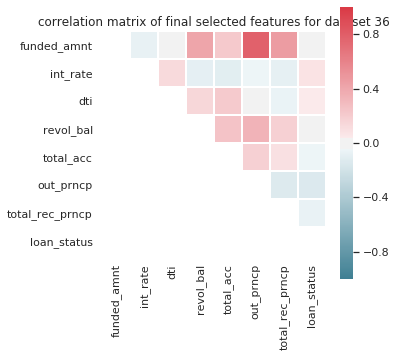

In [38]:
dataViz = data_clean_36
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(5,5)) 
corr = dataViz.corr()    #the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)
plt.title("correlation matrix of final selected features for dataset 36")

##### Selection for dataset60

In [39]:
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train_60,y_train_60)
rfe = RFE(clf_LR, 6)
rfe = rfe.fit(data_with60_final.iloc[:,:-1].values, data_with60_final.iloc[:,-1].values)
print(rfe.support_)
print(rfe.ranking_)

#funded_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,revol_bal,total_acc,out_prncp,total_rec_prncp,loan_status

[ True  True  True False  True False False False  True  True]
[1 1 1 4 1 3 2 5 1 1]


In [40]:
pca = PCA(n_components= 6, whiten=True)
X_train_60_pca = pca.fit_transform(X_train_60)
X_test_60_pca = pca.transform(X_test_60)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))
# funded_amnt, int_rate, emp_length, home_ownership, annual_inc, dti, delinq_2yrs, open_acc, revol_bal, total_rec_prncp, loan_status

Expected Variance is [0.22770434 0.18785342 0.12095839 0.11116571 0.09808296 0.08644617]


After trying different number of features, results showed that 6 of the 10 features should be kept and the total percentage of variance explanation of 6 features is over 83%

In [41]:
explained_variance.sum()

0.8322109941923757

In [42]:
features_60 = ['funded_amnt', 'int_rate', 'emp_length',  'annual_inc', 'out_prncp', 'total_rec_prncp', 'loan_status']
data_clean_60 = data_with60_final
X_train_60, X_test_60 = X_train_60[features_60[:-1]], X_test_60[features_60[:-1]]
data_clean_60 = data_clean_60[features_60]
print(X_train_60.shape)
print(data_clean_60.shape)
data_clean_60.head()

(1804, 6)
(2255, 7)


,funded_amnt,int_rate,emp_length,annual_inc,out_prncp,total_rec_prncp,loan_status
0,0.450896,-0.929553,1.150933,0.025314,0.377942,0.193349,0
4,0.267122,-1.439720,-1.221940,-0.653780,0.340701,-0.057306,1
15,-0.801826,0.223965,0.261106,-0.477415,-0.644022,-0.241375,0
16,0.695927,0.675440,1.150933,0.183954,0.395631,0.580569,0
17,1.623982,-0.358437,-1.518549,0.430865,-1.287684,-0.584190,1


Text(0.5, 1, 'correlation matrix of final selected features for dataset 60')

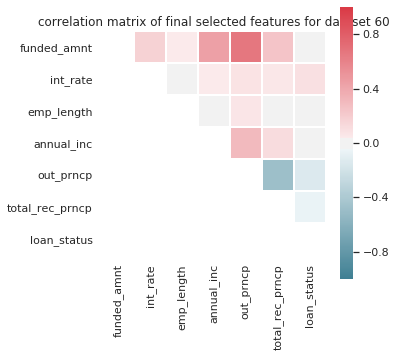

In [43]:
dataViz = data_clean_60
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(5,5)) 
corr = dataViz.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)
plt.title("correlation matrix of final selected features for dataset 60")

### 8. Model: Random Forest with randomized Search
<p>
<span style="color:blue">
>We chose 2 model to fit the data and do comparisions. <br>
> The first model is Random Forest. <br>
> We used the randomized search to find the best hyper paramters for the model.
</span>
</p>

##### RF for dataset 36 months

In [44]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(criterion='gini', random_state=0)
maxFeatures = range(1,data_clean_36.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean_36.iloc[:,:-1].values
y=data_clean_36.iloc[:,-1].values
rand.fit(X,y)

print(rand.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [45]:
#Predict the value of y by using Random Forest, and then compare the predicted value to the actual value and record ROC values.
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForest.fit(X_train_36,y_train_36)
rfPredict_36 = randomForest.predict(X_test_36)
rfPredictproba_36 = randomForest.predict_proba(X_test_36)[:,1] #for ROC curve
rfAccuracy_36 = accuracy_score(y_test_36,rfPredict_36)
roc_score_36 = metrics.roc_auc_score(y_test_36,rfPredict_36)
print("Random Forest accuracy for data of 36 months is ",rfAccuracy_36)

Random Forest accuracy for data of 36 months is  0.9779917469050894


Now we showed the feature importance. 
The importance of each features can be revealed from the below figure. 
The importance of feature ‘total_rec_prncp’ exceeded 35%

Text(0, 0.5, 'Normalized Gini Importance')

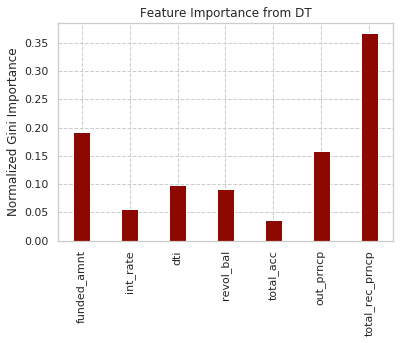

In [46]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features_36)-1), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train_36.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

##### RF for dataset 60 months

In [47]:
rf = RandomForestClassifier(criterion='gini', random_state=0)
maxFeatures = range(1,data_clean_60.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean_60.iloc[:,:-1].values
y=data_clean_60.iloc[:,-1].values
rand.fit(X,y)
print(rand.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [48]:
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForest.fit(X_train_60,y_train_60)
rfPredict_60 = randomForest.predict(X_test_60)
rfPredictproba_60 = randomForest.predict_proba(X_test_60)[:,1] #for ROC curve
rfAccuracy_60 = accuracy_score(y_test_60,rfPredict_60)
roc_score_60 = metrics.roc_auc_score(y_test_60,rfPredict_60)
print("Random Forest accuracy for data of 60 months is ",rfAccuracy_60)

Random Forest accuracy for data of 60 months is  0.9556541019955654


Similar to the '36' dataset，in the '60' dataset, the feature ‘total_rec_prncp’ accounts for the top importance, exceeding 30%.

Text(0, 0.5, 'Normalized Gini Importance')

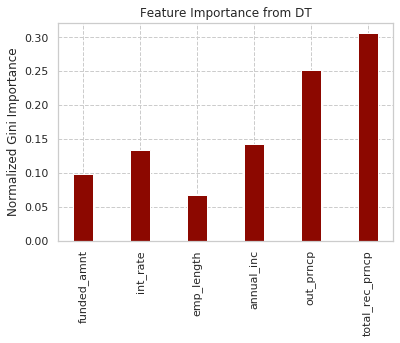

In [49]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features_60)-1), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train_60.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

### 9. Logistic Regression with Grid Search
<p>
<span style="color:blue">
> The second model we used is Logistic Regression. <br>
> We tried to use the grid search to find the best hyper paramters for the model.
</span>
</p>

##### LR for dataset 36 months

In [50]:
from sklearn.model_selection import GridSearchCV

def cross_validation_best_parameters_36(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean_36.iloc[:,:-1].values
    y=data_clean_36.iloc[:,-1].values
    grid.fit(X,y)
    #mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    mean_scores = grid.cv_results_['mean_test_score']
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters_36(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.9800522767918558
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [51]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train_36,y_train_36)
LR_Predict_36 = clf_LR.predict_proba(X_test_36)[:,1]
LR_Predict_bin_36 = clf_LR.predict(X_test_36)
LR_Accuracy_36 = accuracy_score(y_test_36,LR_Predict_36.round())
print("Logistic regression accuracy for data of 36 months is ",LR_Accuracy_36)

Logistic regression accuracy for data of 36 months is  0.9807427785419532


##### LR for dataset 60 months

In [52]:
def cross_validation_best_parameters_60(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean_60.iloc[:,:-1].values
    y=data_clean_60.iloc[:,-1].values
    grid.fit(X,y)
    #mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    mean_scores = grid.cv_results_['mean_test_score']
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters_60(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.9605321507760533
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [53]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train_60,y_train_60)
LR_Predict_60 = clf_LR.predict_proba(X_test_60)[:,1]
LR_Predict_bin_60 = clf_LR.predict(X_test_60)
LR_Accuracy_60 = accuracy_score(y_test_60,LR_Predict_60.round())
print("Logistic regression accuracy for data of 60 months is ",LR_Accuracy_60)

Logistic regression accuracy for data of 60 months is  0.9556541019955654


To summarize the model accuract for different models and different datasets, put the accuracy outputs together.

In [54]:
print("Random Forest accuracy for data of 36 months is ",rfAccuracy_36)
print("Random Forest accuracy for data of 60 months is ",rfAccuracy_60)
print("Logistic regression accuracy for data of 36 months is ",LR_Accuracy_36)
print("Logistic regression accuracy for data of 60 months is ",LR_Accuracy_60)

Random Forest accuracy for data of 36 months is  0.9779917469050894
Random Forest accuracy for data of 60 months is  0.9556541019955654
Logistic regression accuracy for data of 36 months is  0.9807427785419532
Logistic regression accuracy for data of 60 months is  0.9556541019955654


## Evaluate your model performance in deciding whether to lend or not.

### 10. Model comparison and performance evaluation
<p>
<span style="color:blue">
> Compared the performances of Random Forest and Logistic Regression. <br>
> Compared the performances of 36 months and 60 months data under the same model. <br>
> Used ROC curve and confusion matrix for evaluation as the model accuracy is not enough.<br><br>
> In our models, prediction of "Good Loan" means that we decide to lend the money to the customer, and prediction of "Bad loan" represents the opposite.
</span>
</p>

##### Raondom Forest for 36 months

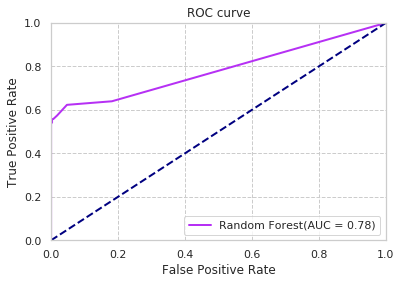

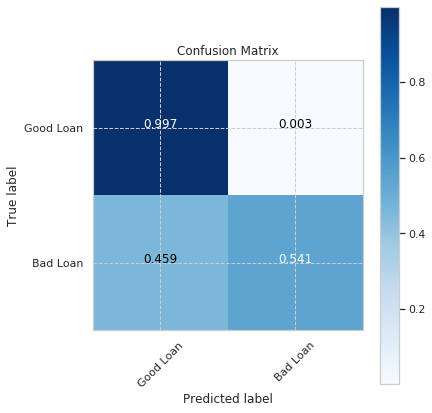

In [55]:
plotAUC(y_test_36,rfPredictproba_36, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix_36(rfPredict_36, normalize=True)
plt.show()

Figures showed the ROC curve of the '36 months' dataset, AUC equals to 0.78. <br>
- The ROC curve appraches 0.6 at the beginning and increases sharply at the beginning and then increasing linearly. Meanwhile, it can be drawn from the below confusion matrix that TP is very high but TN is not obvious.
- We think that it might be caused the data: the value '0' of 'loan_status' indicates GOOD LOAN and the ratio of '0' exceeds 95%, while ratio of '1' for BAD LOAN is less than 5%.

##### Raondom Forest for 60 months

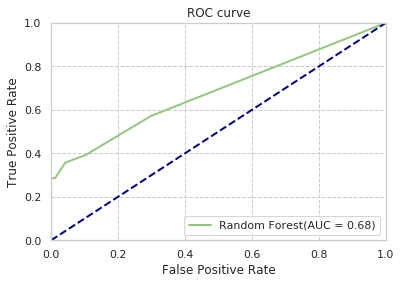

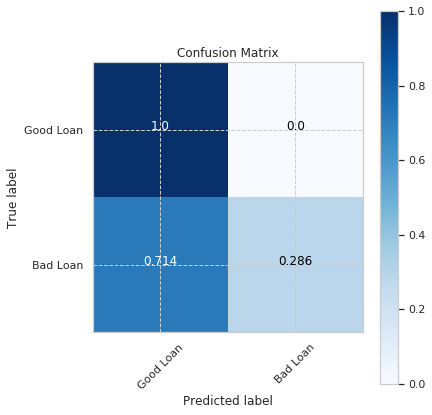

In [56]:
plotAUC(y_test_60,rfPredictproba_60, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix_60(rfPredict_60, normalize=True)
plt.show()

Comparing with the '36' dataset's, the ROC curve of the '60' dataset is performing worse, where AUC equals to 0.68.<br>
- In the test dataset, there are 2255 samples in the '60' dataset, in which the value '0' of 'loan_status' accounts for 94%. This contributes to the ROC curve increasing sharply at the beginning and then increasing linearly.<br>
- Due to the fact that the sample size is small as well as not evenly distributed, the model outcome is not ideal.<br>
- The confusion matrix is similar compared to the other dataset. However, the prediction of the BAD LOAN of the '60' dataset is less accurate and the value of TN is too low. In other words, the performance is not good.

##### Logistic Regression for 36 months
To have better comparison between different models, we included the ROC curve of Random Forest in the figure of Logistic Regression

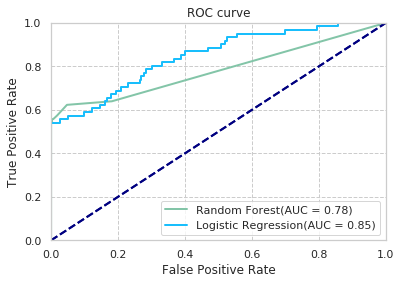

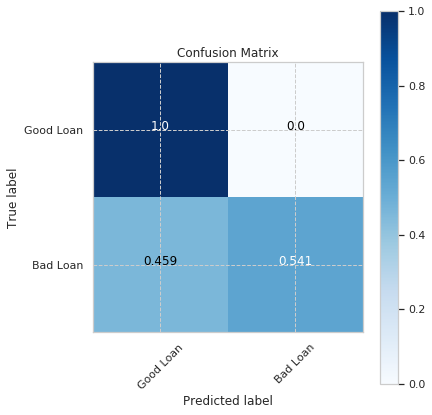

In [57]:
plotAUC(y_test_36,rfPredictproba_36, 'Random Forest')
plotAUC(y_test_36,LR_Predict_36,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix_36(LR_Predict_bin_36, normalize=True)
plt.show()

The figure demonstrates the performances on '36' dataset ROC curve under RF and LR.
- It is obvious from the comparison that the AUC value of LR is larger than RF, which is 0.85.
- It indicates that the results of the LR model is better, which is caused by the data.
- The ROC curve increases rapidly at the beginning, and the TPR exceeds 0.5.
- The performance of the confusion matrix is similar to RF's confusion matrix, where the value of TP is high and the value of TN is 0.541, also slightly better than the performance of RF.

##### Logistic Regression for 60 months

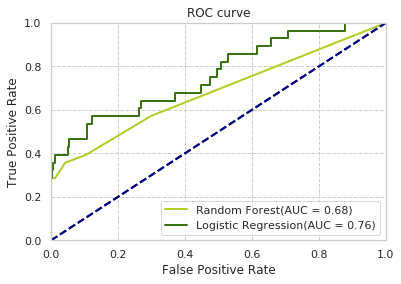

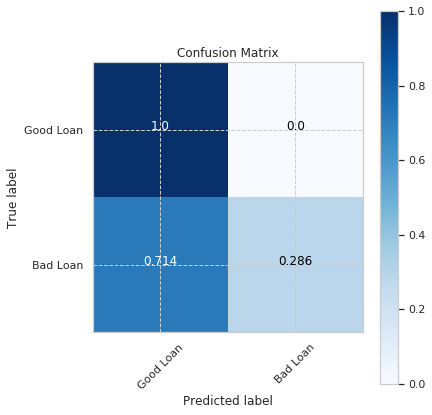

In [58]:
plotAUC(y_test_60,rfPredictproba_60, 'Random Forest')
plotAUC(y_test_60,LR_Predict_60,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix_60(LR_Predict_bin_60, normalize=True)
plt.show()

- Comparing the ROC curves of LR and RF relatively applied in the '36' dataset, the performance of the '60' dataset is not good.
- The value of AUC in LR is 0.76, which is slighty better than the AUC value in RF, but is still not as good as the performance of the '36' dataset.
- Likewise, comparing with the confusion matrix of the '36' dataset, even under the LR, the performance of the '60' dataset is not good with TN equals to 0.286.

### Precision,recall,F1score for all models
<p>
<span style="color:blue">
> To sum up the performances clearly, we showed the below table for all models and all datasets.
</span>
</p>

In [59]:
from sklearn.metrics import classification_report
print("RF_36",classification_report(y_test_36, rfPredict_36, target_names=None))
print("LR_36",classification_report(y_test_36, LR_Predict_bin_36, target_names=None))
print("RF_60",classification_report(y_test_60, rfPredict_60, target_names=None))
print("LR_60",classification_report(y_test_60, LR_Predict_bin_60, target_names=None))

RF_36               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1393
           1       0.89      0.54      0.67        61

   micro avg       0.98      0.98      0.98      1454
   macro avg       0.94      0.77      0.83      1454
weighted avg       0.98      0.98      0.98      1454

LR_36               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1393
           1       1.00      0.54      0.70        61

   micro avg       0.98      0.98      0.98      1454
   macro avg       0.99      0.77      0.85      1454
weighted avg       0.98      0.98      0.98      1454

RF_60               precision    recall  f1-score   support

           0       0.95      1.00      0.98       423
           1       1.00      0.29      0.44        28

   micro avg       0.96      0.96      0.96       451
   macro avg       0.98      0.64      0.71       451
weighted avg       0.96      0.96      0.94       451

L

#### We can now draw a conclusion that in this project, the Logistic Regression model performs better than the Random Forest model, while the performances of dataset of '36' are always better than '60'.